<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/linear-classification/ANN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

[]


0

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Jan__6_16:45:21_PST_2023
Cuda compilation tools, release 12.0, V12.0.140
Build cuda_12.0.r12.0/compiler.32267302_0


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


2024-06-01 18:50:32.679060: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9140 - val_loss: 0.1399 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1037 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9669 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9729 - val_loss: 0.0780 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0748 - accuracy: 0.9761 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 6/10
1549/1875 [=======================>......] - ETA: 0s - loss: 0.0644 - accuracy: 0.9791Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
  File "/tmp/ipykernel_19125/3689531756.py", line 1, in <module>
    r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/site-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 825, in __call__
  File "/home/vzadmin/miniconda3/envs/machine_learning/lib/python3.8/s

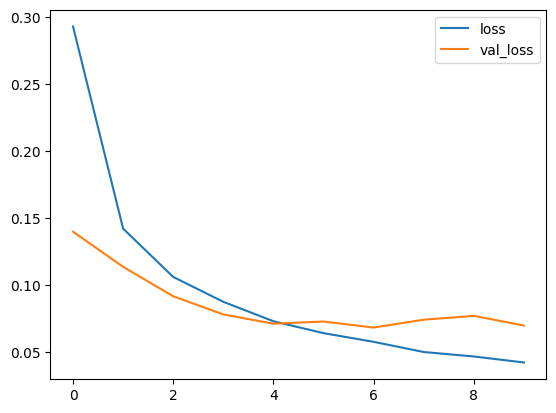

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

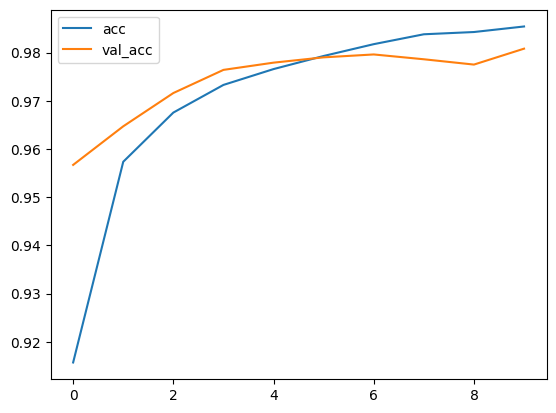

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# The more we train, the better we do on training set, but validation accuracy may or may not improve. Regularization is important. Hyperparameters can be chosen by trial and error or random search

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9808
[0.07007192075252533, 0.9807999730110168]


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 971    1    2    0    1    1    2    1    1    0]
 [   0 1128    2    1    0    0    2    0    2    0]
 [   0    2 1019    1    1    0    1    4    4    0]
 [   1    0    4  992    0    7    0    3    3    0]
 [   1    0    1    1  959    0    5    2    2   11]
 [   2    0    0    4    2  874    5    2    3    0]
 [   5    3    1    1    4    3  940    0    1    0]
 [   2    4    8    2    1    0    0 1006    1    4]
 [   5    1    2    5    4    3    4    3  944    3]
 [   1    3    0    6   10    4    0    6    4  975]]
[[ 971    1    2    0    1    1    2    1    1    0]
 [   0 1128    2    1    0    0    2    0    2    0]
 [   0    2 1019    1    1    0    1    4    4    0]
 [   1    0    4  992    0    7    0    3    3    0]
 [   1    0    1    1  959    0    5    2    2   11]
 [   2    0    0    4    2  874    5    2    3    0]
 [   5    3    1    1    4    3  940    0    1    0]
 [ 

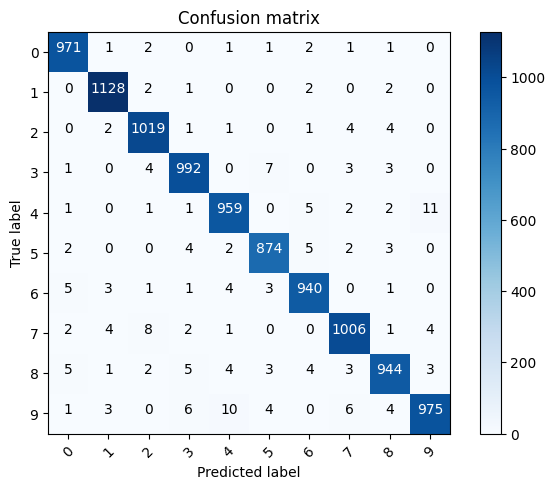

In [ ]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
    :param cm:
    :param classes:
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=-1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label is 5 and misclassified is 6')

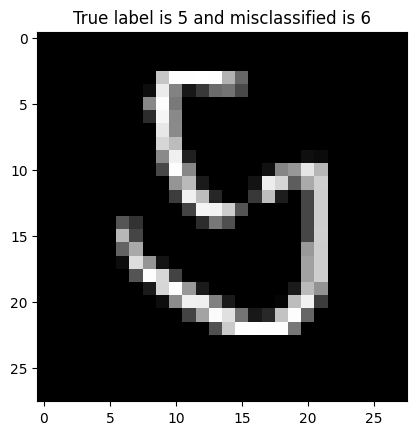

In [ ]:
# Show some misclassified sample
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label is {} and misclassified is {}".format(y_test[i], p_test[i]))